# Asgmt: Multiple Linear Regression on Solar_Power_Generation.csv


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset & Check for Nan in the Data


In [2]:
dataset = pd.read_csv('Solar_Power_Generation.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values  

In [3]:
print(X)

[[   2.17       31.       1035.       ...   58.753108   83.237322
   128.33543 ]
 [   2.31       27.       1035.1      ...   45.408585   75.143041
   139.6553  ]
 [   3.65       33.       1035.4      ...   32.848282   68.820648
   152.53769 ]
 ...
 [   7.27       90.       1026.3      ...   25.249506   65.827032
   197.33868 ]
 [   8.25       81.       1025.5      ...   36.361161   70.496313
   211.30027 ]
 [   8.         80.       1025.3      ...   48.452849   76.919574
   223.04931 ]]


In [4]:
y = y.reshape(len(y), 1) # type: ignore

print(y)


[[ 454.10095 ]
 [1411.9994  ]
 [2214.8493  ]
 ...
 [ 158.36778 ]
 [ 126.95306 ]
 [  20.055031]]


In [5]:
missing_values = dataset.isnull().sum() # count of missing values in each column
print(missing_values)

temperature_2_m_above_gnd            1
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    1
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        1
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   1
dtype: int64


In [6]:
# fill missing values with the mean value of the column (Total Bedrooms)

dataset = dataset.fillna(dataset.median())

missing_values = dataset.isnull().sum() # count of missing values in each column
print(missing_values)


temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64


## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# There is some Nan after spliting the data, so we need to fill it with the median value of the column
X_train = pd.DataFrame(X_train).fillna(pd.DataFrame(X_train).median()).values
X_test = pd.DataFrame(X_test).fillna(pd.DataFrame(X_test).median()).values
y_train = pd.DataFrame(y_train).fillna(pd.DataFrame(y_train).median()).values
y_test = pd.DataFrame(y_test).fillna(pd.DataFrame(y_test).median()).values

In [8]:
#For Debugging

print(X_train)

print(pd.DataFrame(X_train).isnull().sum())


[[  15.63       49.       1015.6      ...   23.451198   34.293318
   212.57559 ]
 [  15.48       49.       1007.3      ...   59.211036   54.276459
   100.03522 ]
 [  24.81       40.       1011.4      ...   18.357894   27.555822
   183.99259 ]
 ...
 [  25.31       23.       1010.7      ...   36.734719   29.440078
   122.96393 ]
 [  29.46       11.       1012.9      ...   35.281959   34.430369
   126.14556 ]
 [  24.66       37.       1011.5      ...   36.465422   38.787933
   234.82231 ]]
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64


## Training the Multiple Linear Regression model on the Training set

In [9]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Here it check for the statically significant features and check for the p-values, since it small it is statically significant

LinearRegression()

## Predicting the Test set results

In [10]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2) # set the decimal places to 2

print(y_pred) # Horizontal vector of predicted values
print(y_test) # Horizontal vector of real values

[[1985.11]
 [1699.74]
 [ 921.  ]
 [-305.75]
 [ 352.65]
 [1200.03]
 [ 625.88]
 [ 315.06]
 [2407.22]
 [1405.3 ]
 [1982.78]
 [1765.2 ]
 [ 931.9 ]
 [ 685.76]
 [1897.45]
 [ 590.07]
 [1852.05]
 [ 334.17]
 [1603.51]
 [  69.93]
 [ 553.71]
 [1417.78]
 [1005.71]
 [  30.26]
 [1291.54]
 [-975.91]
 [ 394.93]
 [1487.04]
 [ 434.8 ]
 [2084.99]
 [2325.88]
 [ 810.89]
 [1876.09]
 [2275.13]
 [ 777.53]
 [1294.03]
 [1175.76]
 [2273.6 ]
 [1973.42]
 [1219.53]
 [ 146.02]
 [ 823.41]
 [-395.69]
 [ 755.48]
 [1810.02]
 [1935.1 ]
 [1315.01]
 [2114.8 ]
 [2214.9 ]
 [2115.49]
 [2444.49]
 [2248.37]
 [2523.96]
 [ -54.56]
 [1456.28]
 [ 480.52]
 [ 415.12]
 [ 704.72]
 [ 983.19]
 [1981.42]
 [ 951.12]
 [ 464.34]
 [1866.26]
 [2204.88]
 [-214.78]
 [1263.99]
 [2461.03]
 [2149.01]
 [ 721.3 ]
 [1345.76]
 [2017.64]
 [ 781.26]
 [-562.12]
 [1492.5 ]
 [2099.73]
 [ 256.21]
 [2245.18]
 [  92.96]
 [1801.3 ]
 [1479.62]
 [1906.6 ]
 [1786.53]
 [1423.03]
 [1808.73]
 [ -39.3 ]
 [1453.75]
 [1286.42]
 [ 860.46]
 [1287.09]
 [1425.6 ]
 [2251.69]

In [11]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) # compare the predicted and actual values

[[1985.11 1730.19]
 [1699.74  904.5 ]
 [ 921.   1112.44]
 ...
 [1063.81  214.28]
 [ 320.26  344.17]
 [1726.14 1215.96]]


In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R-squared: {r2:.4f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

R-squared: 0.6966
MAE: 395.64
RMSE: 515.21


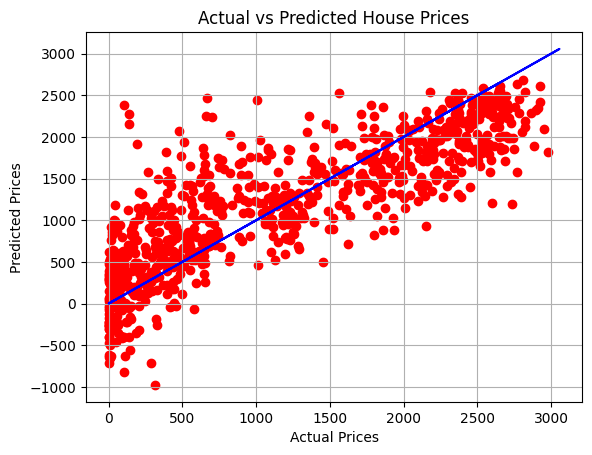

In [13]:
# Visualizing the Multiple Regression results

plt.scatter(y_test, y_pred, color='Red')
plt.plot(y, y, color='Blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()